In [242]:
import matplotlib.pyplot as plt
import matplotlib.colors as color
import numpy as np
import random

In [243]:
ablty=14*15
p=100

7190.078920249578

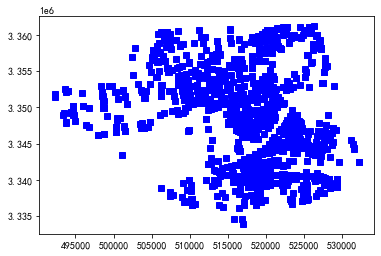

In [244]:
# demandCoordinates = [(88, 16), (25, 76), (69, 13), (73, 56), (80, 100), (22, 92), (32, 84), (73, 46), (
#         29, 10), (92, 32), (44, 44), (55, 26), (71, 27), (51, 91), (89, 54), (43, 28), (40, 78), (60, 66)]
data=np.load("杭州mergedXY.npy")
# print(data)
demandCoordinates=[(data[i][0],data[i][1]) for i in range(data.shape[0])]
size=data.shape[0]
q=[random.random()*10 for i in range(size)]
for xy in demandCoordinates:
    plt.plot(xy[0],xy[1],c="b",marker="s")

np.sum(q)

In [245]:
A=[(i,j) for i in range(size) for j in range(size)]
N=[i for i in range(size)]
dis={(i,j):np.hypot(demandCoordinates[i][0]-demandCoordinates[j][0],demandCoordinates[i][1]-demandCoordinates[j][1]) for i,j in A}

In [246]:
from gurobipy import Model, GRB , quicksum

In [247]:
mdl=Model("p-center")


In [248]:
x=mdl.addVars(A,vtype=GRB.CONTINUOUS,ub=1,lb=0)
# x=mdl.addVars(A,vtype=GRB.BINARY)
n=mdl.addVars(N,vtype=GRB.INTEGER)

In [249]:
mdl.ModelSense=GRB.MINIMIZE
mdl.setObjective(quicksum(x[i,j]*dis[i,j] for i,j in A))

In [250]:
mdl.addConstrs(quicksum(x[i,j] for j in N)== 1 for i in N);

In [251]:
mdl.addConstr(quicksum(n[i] for i in N )== p);

In [252]:
mdl.addConstrs((quicksum(q[i]*x[i,j] for i in N)<=n[j]*ablty )for j in N);

In [253]:
mdl.optimize()

Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (mac64[arm])
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 2907 rows, 2112662 columns and 4225324 nonzeros
Model fingerprint: 0xb50ab0ce
Variable types: 2111209 continuous, 1453 integer (0 binary)
Coefficient statistics:
  Matrix range     [1e-02, 2e+02]
  Objective range  [5e-01, 4e+04]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+02]
Presolve removed 1 rows and 1 columns
Presolve time: 2.79s
Presolved: 2906 rows, 2112661 columns, 4225322 nonzeros
Variable types: 2111209 continuous, 1452 integer (0 binary)
Found heuristic solution: objective 2.102707e+07

Root simplex log...

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   2.245786e+02   0.000000e+00      6s

Starting sifting (using dual simplex for sub-problems)...

    Iter     Pivots    Primal Obj      Dual Obj        Time
       0          0     infinity      0.0000000e+0

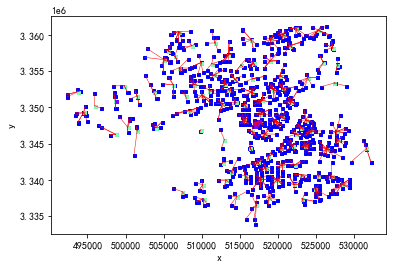

In [254]:
# 画所有点及标注需求
markersize=3
linewidth=0.5
for i in N:
    xy=demandCoordinates[i]
    plt.plot(xy[0],xy[1],c="b",marker="s",markersize=markersize)
    #plt.text(xy[0],xy[1],f"{q[i]}")

# 画需求量
for i in N:
    if (n[i].x>0):
        xy=demandCoordinates[i]
        col=plt.cm.rainbow
        nMax=0.0
        for ni in N:
            # print(type(n[ni].x),n[ni].x,type(nMax))
            if n[ni].x>nMax:
                nMax=n[ni].x
        norm=color.Normalize(vmax=round(nMax)+1,vmin=0)
        plt.plot(xy[0],xy[1],marker="s",color=col(norm(n[i].x)),markersize=markersize)
        # plt.text(xy[0]-5,xy[1]-5,f"{n[i].x}",color="b")
        

# 画供应线
for i,j in A:
    if x[i,j].x>0.2:
        demandCoordinates[i][0],demandCoordinates[i][1]
        demandCoordinates[j][0],demandCoordinates[j][1]
        plt.plot([demandCoordinates[i][0],demandCoordinates[j][0]],[demandCoordinates[i][1],demandCoordinates[j][1]],color="r",linewidth=linewidth)



plt.xlabel("x")
plt.ylabel("y")
plt.show()
    

In [ ]:
sum=0
for i in N:
    print(round(n[i].x),end=",")
    sum=sum+n[i].x
sum

0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

1.0

In [ ]:
q

[4.690176951007722,
 7.877814204946903,
 6.709188250372363,
 5.008265741624585,
 1.7664573365804048,
 0.9038385357732193,
 0.5254872573366909,
 6.163819478237695,
 4.045400679690574,
 8.296575875153573,
 8.874863518214935,
 8.36605373697365,
 5.593904435421965,
 0.49411150445678453,
 2.2761338858045335,
 3.6832811608276463,
 2.639897993453082,
 4.563665192580075,
 6.772939315515719,
 4.828079824118835,
 1.4578261381780488,
 3.356689010134577,
 9.906722261180672,
 6.521742522309949,
 4.053185154834374,
 5.602634929312188,
 4.136280328889019,
 0.5340903894791649,
 2.6221174023054203,
 6.743123986376542,
 5.395386342485704,
 3.4548875263545953,
 9.615675185888769,
 4.404771118415509,
 2.6084437118987767,
 2.863252634819723,
 1.6013068224270854,
 5.341831392123227,
 2.6790200728813165,
 7.976526244544076,
 5.907134188873181,
 9.673966910317622,
 2.397621709624892,
 4.109822426987064,
 7.317111416492706,
 7.090782038508802,
 9.441189865472122,
 7.688021023183933,
 2.623927198018513,
 4.6925

In [ ]:
array=np.array([])
for i in N:
    array=np.append(array,n[i].x)
array
np.save("n.npy",array)

array2=np.zeros((size,size))
for i,j in A:
    array2[i,j]=x[i,j].x
np.save("x.npy",array2)